### Import packages

In [28]:
import numpy as np

In [29]:
from PIL import Image

### Helper code

#### Basics

In [30]:
def make_array(f, x, y):
    data = [[f(i, j) for i in range(x)] for j in range(y)]
    return np.array(data, dtype='uint8')

In [31]:
def make_image(f, x, y):
    grid = make_array(f, x, y)
    return Image.fromarray(grid, "RGB")

#### Image Data

In [32]:
class ImageData(object):
    def __init__(self, filename):
        self.filename = filename
        data = self.load_data(filename)
    
    def load_data(self, filename):
        self.image = Image.open(filename)
    
    def get(self, x, y):
        return self.image.getpixel((x, y))
    
    @property
    def height(self):
        return self.image.height
        
    @property
    def width(self):
        return self.image.width
        
def load_image(filename):
    return ImageData(filename)

#### Distortion functions

In [47]:
def distort_image(image_data, mapping):
    w = image_data.width
    h = image_data.height
    
    def f(x, y):
        mx, my = mapping(x, y)
        if mx < 0 or mx >= w or my < 0 or my >= h:
            raise ValueError(
                "For the pixel (%d, %d) in the final image, "
                "there is no pixel (%d, %d) in the source image. "
                "Size of source image is (%d, %d)."
                % (x, y, mx, my, w, h))
        return image_data.get(mx, my)
        
    return make_image(f, w, h)

In [53]:
def distort_colors(image_data, mapping):
    w = image_data.width
    h = image_data.height
    
    def f(x, y):
        r_, g_, b_ = image_data.get(x, y)
        r, g, b = mapping(r_, g_, b_)
        if r < 0 or r > 255 or g < 0 or g > 255 or b < 0 or b > 255:
            raise ValueError(
                "For the pixel (%d, %d) in the final image, "
                "the color (%d, %d, %d) is not a correct value. "
                "The original color was (%d, %d, %d)."
                % (x, y, r, g, b, r_, g_, b_))
        return r, g, b
        
    return make_image(f, w, h)

### Load Images 

In [45]:
omj = load_image("old_man_jenkins.jpg")

### Modify Images

#### Distort Image example

In [50]:
def stretch_strips(x, y):
    return x, (y // 25) * 25

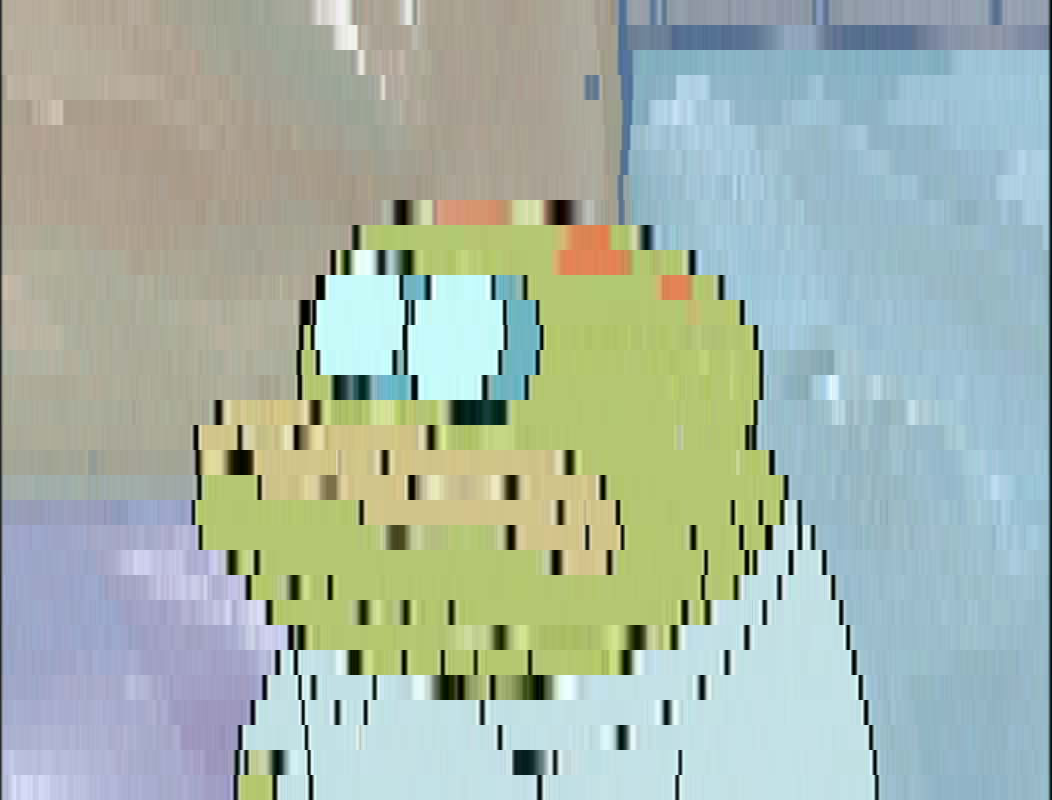

In [51]:
distort_image(omj, stretch_strips)

#### Distort Colors example

In [54]:
def weird_colors(r, g, b):
    return g, r, 255 - b

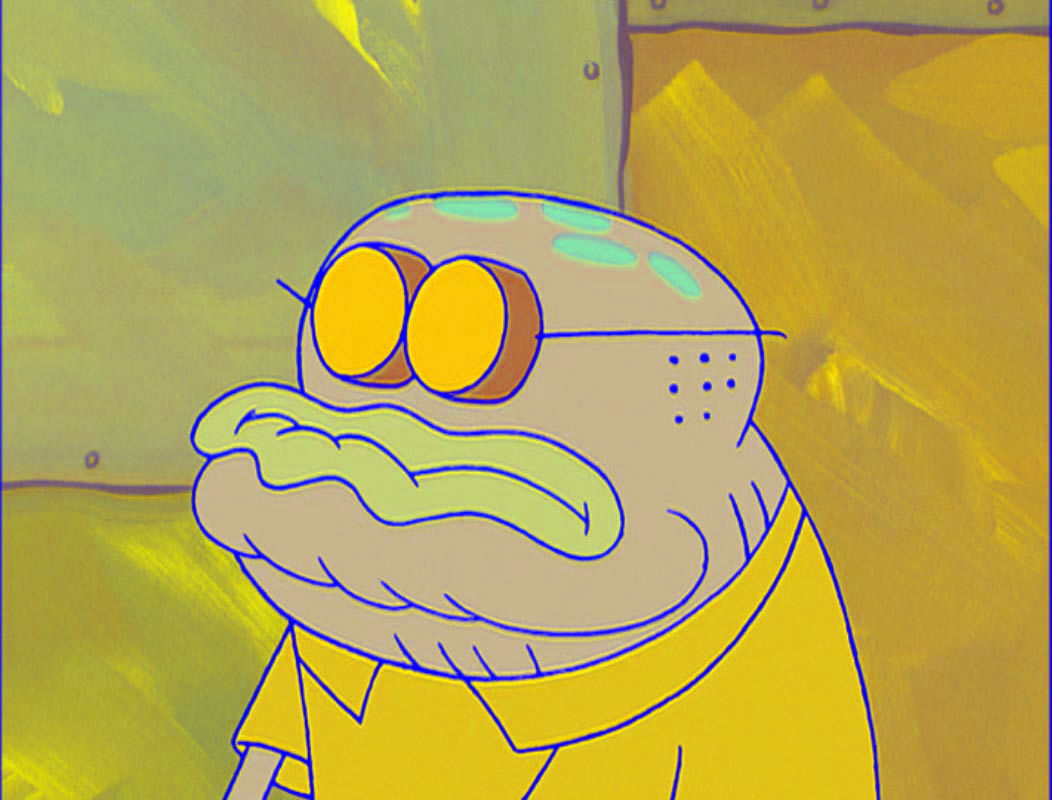

In [55]:
distort_colors(omj, weird_colors)